In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

### Gem Classification Model (Local Execution)

This notebook contains the code for gem classification, adapted to run locally in your VS Code environment. The price prediction part and Google Colab specific code have been removed.

In [ ]:

DATA_DIR = f'C:/Users/saide/OneDrive/Desktop/College/SEM-5/MINORS DS' 

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32

def load_images_from_folder(folder):
    
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        label_path = os.path.join(folder, subfolder)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, IMAGE_SIZE)
                    images.append(img)
                    labels.append(subfolder)
    return np.array(images), np.array(labels)

print("Loading training data...")
train_images, train_labels = load_images_from_folder(os.path.join(DATA_DIR, 'train'))
print(f"Loaded {len(train_images)} training images.")

print("Loading testing data...")
test_images, test_labels = load_images_from_folder(os.path.join(DATA_DIR, 'test'))
print(f"Loaded {len(test_images)} testing images.")

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

num_classes = len(label_encoder.classes_)
train_labels_categorical = to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels_categorical = to_categorical(test_labels_encoded, num_classes=num_classes)

print(f"Detected {num_classes} gem types: {label_encoder.classes_}")

Loading training data...
Loaded 2855 training images.
Loading testing data...
Loaded 363 testing images.
Detected 87 gem types: ['Alexandrite' 'Almandine' 'Amazonite' 'Amber' 'Amethyst' 'Ametrine'
 'Andalusite' 'Andradite' 'Aquamarine' 'Aventurine Green'
 'Aventurine Yellow' 'Benitoite' 'Beryl Golden' 'Bixbite' 'Bloodstone'
 'Blue Lace Agate' 'Carnelian' 'Cats Eye' 'Chalcedony' 'Chalcedony Blue'
 'Chrome Diopside' 'Chrysoberyl' 'Chrysocolla' 'Chrysoprase' 'Citrine'
 'Coral' 'Danburite' 'Diamond' 'Diaspore' 'Dumortierite' 'Emerald'
 'Fluorite' 'Garnet Red' 'Goshenite' 'Grossular' 'Hessonite' 'Hiddenite'
 'Iolite' 'Jade' 'Jasper' 'Kunzite' 'Kyanite' 'Labradorite' 'Lapis Lazuli'
 'Larimar' 'Malachite' 'Moonstone' 'Morganite' 'Onyx Black' 'Onyx Green'
 'Onyx Red' 'Opal' 'Pearl' 'Peridot' 'Prehnite' 'Pyrite' 'Pyrope'
 'Quartz Beer' 'Quartz Lemon' 'Quartz Rose' 'Quartz Rutilated'
 'Quartz Smoky' 'Rhodochrosite' 'Rhodolite' 'Rhodonite' 'Ruby'
 'Sapphire Blue' 'Sapphire Pink' 'Sapphire Purple'

In [ ]:

def build_gem_classifier_model(input_shape, num_classes):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = train_images.shape[1:]
gem_classifier = build_gem_classifier_model(input_shape, num_classes)
gem_classifier.summary()

C:\Users\saide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 87)             │        22,359 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,506,391 (32.45 MB)

 Trainable params: 8,505,431 (32.45 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:

history = gem_classifier.fit(
    train_images, train_labels_categorical,
    epochs=20, 
    batch_size=BATCH_SIZE,
    validation_split=0.2, 
    verbose=1
)


Training Gem Classification Model...
Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 48s 586ms/step - accuracy: 0.1076 - loss: 4.2658 - val_accuracy: 0.0000e+00 - val_loss: 12.5270
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 59s 828ms/step - accuracy: 0.3114 - loss: 2.5665 - val_accuracy: 0.0490 - val_loss: 10.2529
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 55s 766ms/step - accuracy: 0.4206 - loss: 2.1172 - val_accuracy: 0.0000e+00 - val_loss: 16.6352
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 709ms/step - accuracy: 0.5485 - loss: 1.5746 - val_accuracy: 0.0000e+00 - val_loss: 19.3553
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 713ms/step - accuracy: 0.6005 - loss: 1.3377 - val_accuracy: 0.0000e+00 - val_loss: 24.9343
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 60s 834ms/step - accuracy: 0.6536 - loss: 1.1525 - val_accuracy: 0.0000e+00 - val_loss: 8.6911
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 59s 812ms/step - accuracy: 0.7190 - loss: 0.9662 - val_accuracy: 0.0315 - val_loss: 9.8793
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━


Evaluating Gem Classification Model...
Test Loss: 3.7583
Test Accuracy: 0.4683


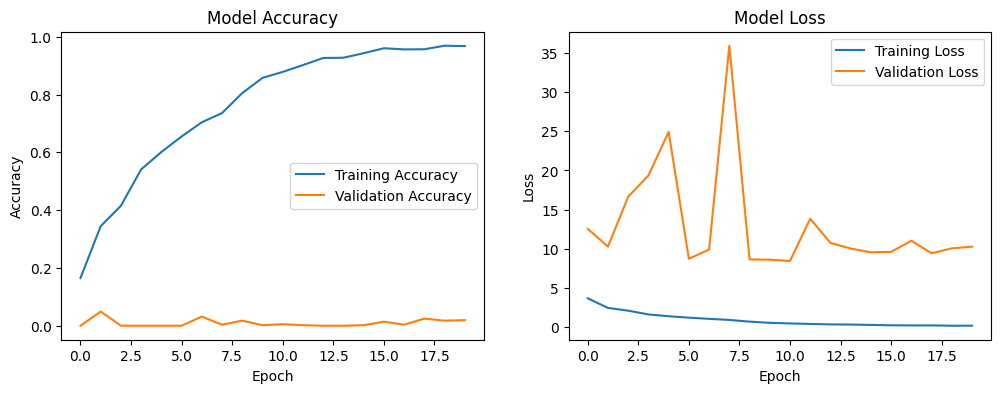

In [ ]:

loss, accuracy = gem_classifier.evaluate(test_images, test_labels_categorical, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

def preprocess_image(image_path, target_size=IMAGE_SIZE):

    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0) 
    return img

def predict_gem_type(image_path, model, label_encoder):
    """Predicts the gem type for a given image."""
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    gem_type_index = np.argmax(prediction)
    gem_type = label_encoder.inverse_transform([gem_type_index])[0]
    confidence = np.max(prediction)
    return gem_type, confidence, gem_type_index

In [ ]:

example_image_path = os.path.join(DATA_DIR, 'test', 'Ruby', 'ruby_18.jpg') 

try:
    predicted_gem_type, confidence, _ = predict_gem_type(example_image_path, gem_classifier, label_encoder)
    print(f"Image: {os.path.basename(example_image_path)}")
    print(f"Predicted Gem Type: {predicted_gem_type} with confidence {confidence:.2f}")
except FileNotFoundError as e:
    print(e)
    print("Please make sure the example image path is correct and the image exists.")
except Exception as e:
    print(f"An error occurred during prediction: {e}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step


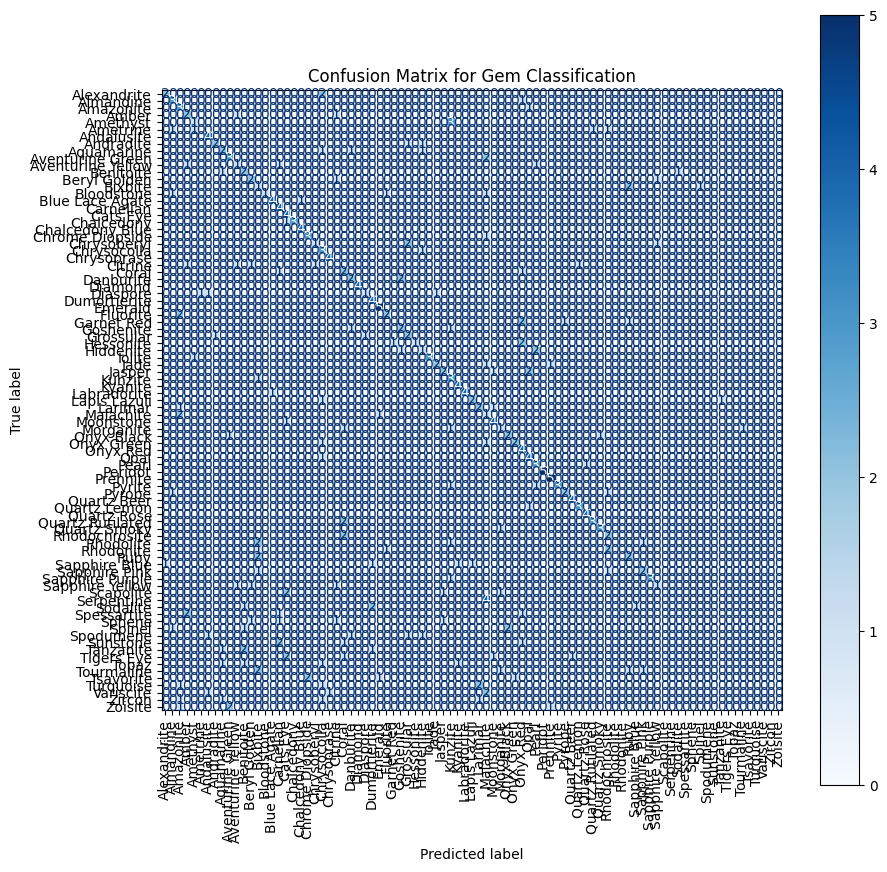

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_probs = gem_classifier.predict(test_images)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(test_labels_encoded, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
fig, ax = plt.subplots(figsize=(10, 10)) # Adjust figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title('Confusion Matrix for Gem Classification')
plt.show()